In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(rc={"figure.figsize":(8, 6), "figure.dpi":300}) # Increased resolution

In [37]:
data_read = pd.read_csv(r"NLP_READ_Dir_Input_stats.csv") # Corpus readability data
data_com = pd.read_csv(r"NLP_SentenceComplexity_Dir_Input.csv") # Corpus complexity data
data_nom = pd.read_csv(r"NLP_NOM_Dir_Input_freq_bySent.csv") # Corpus nominalization data

Text(0.99, 0.93, 'Median: 6.0')

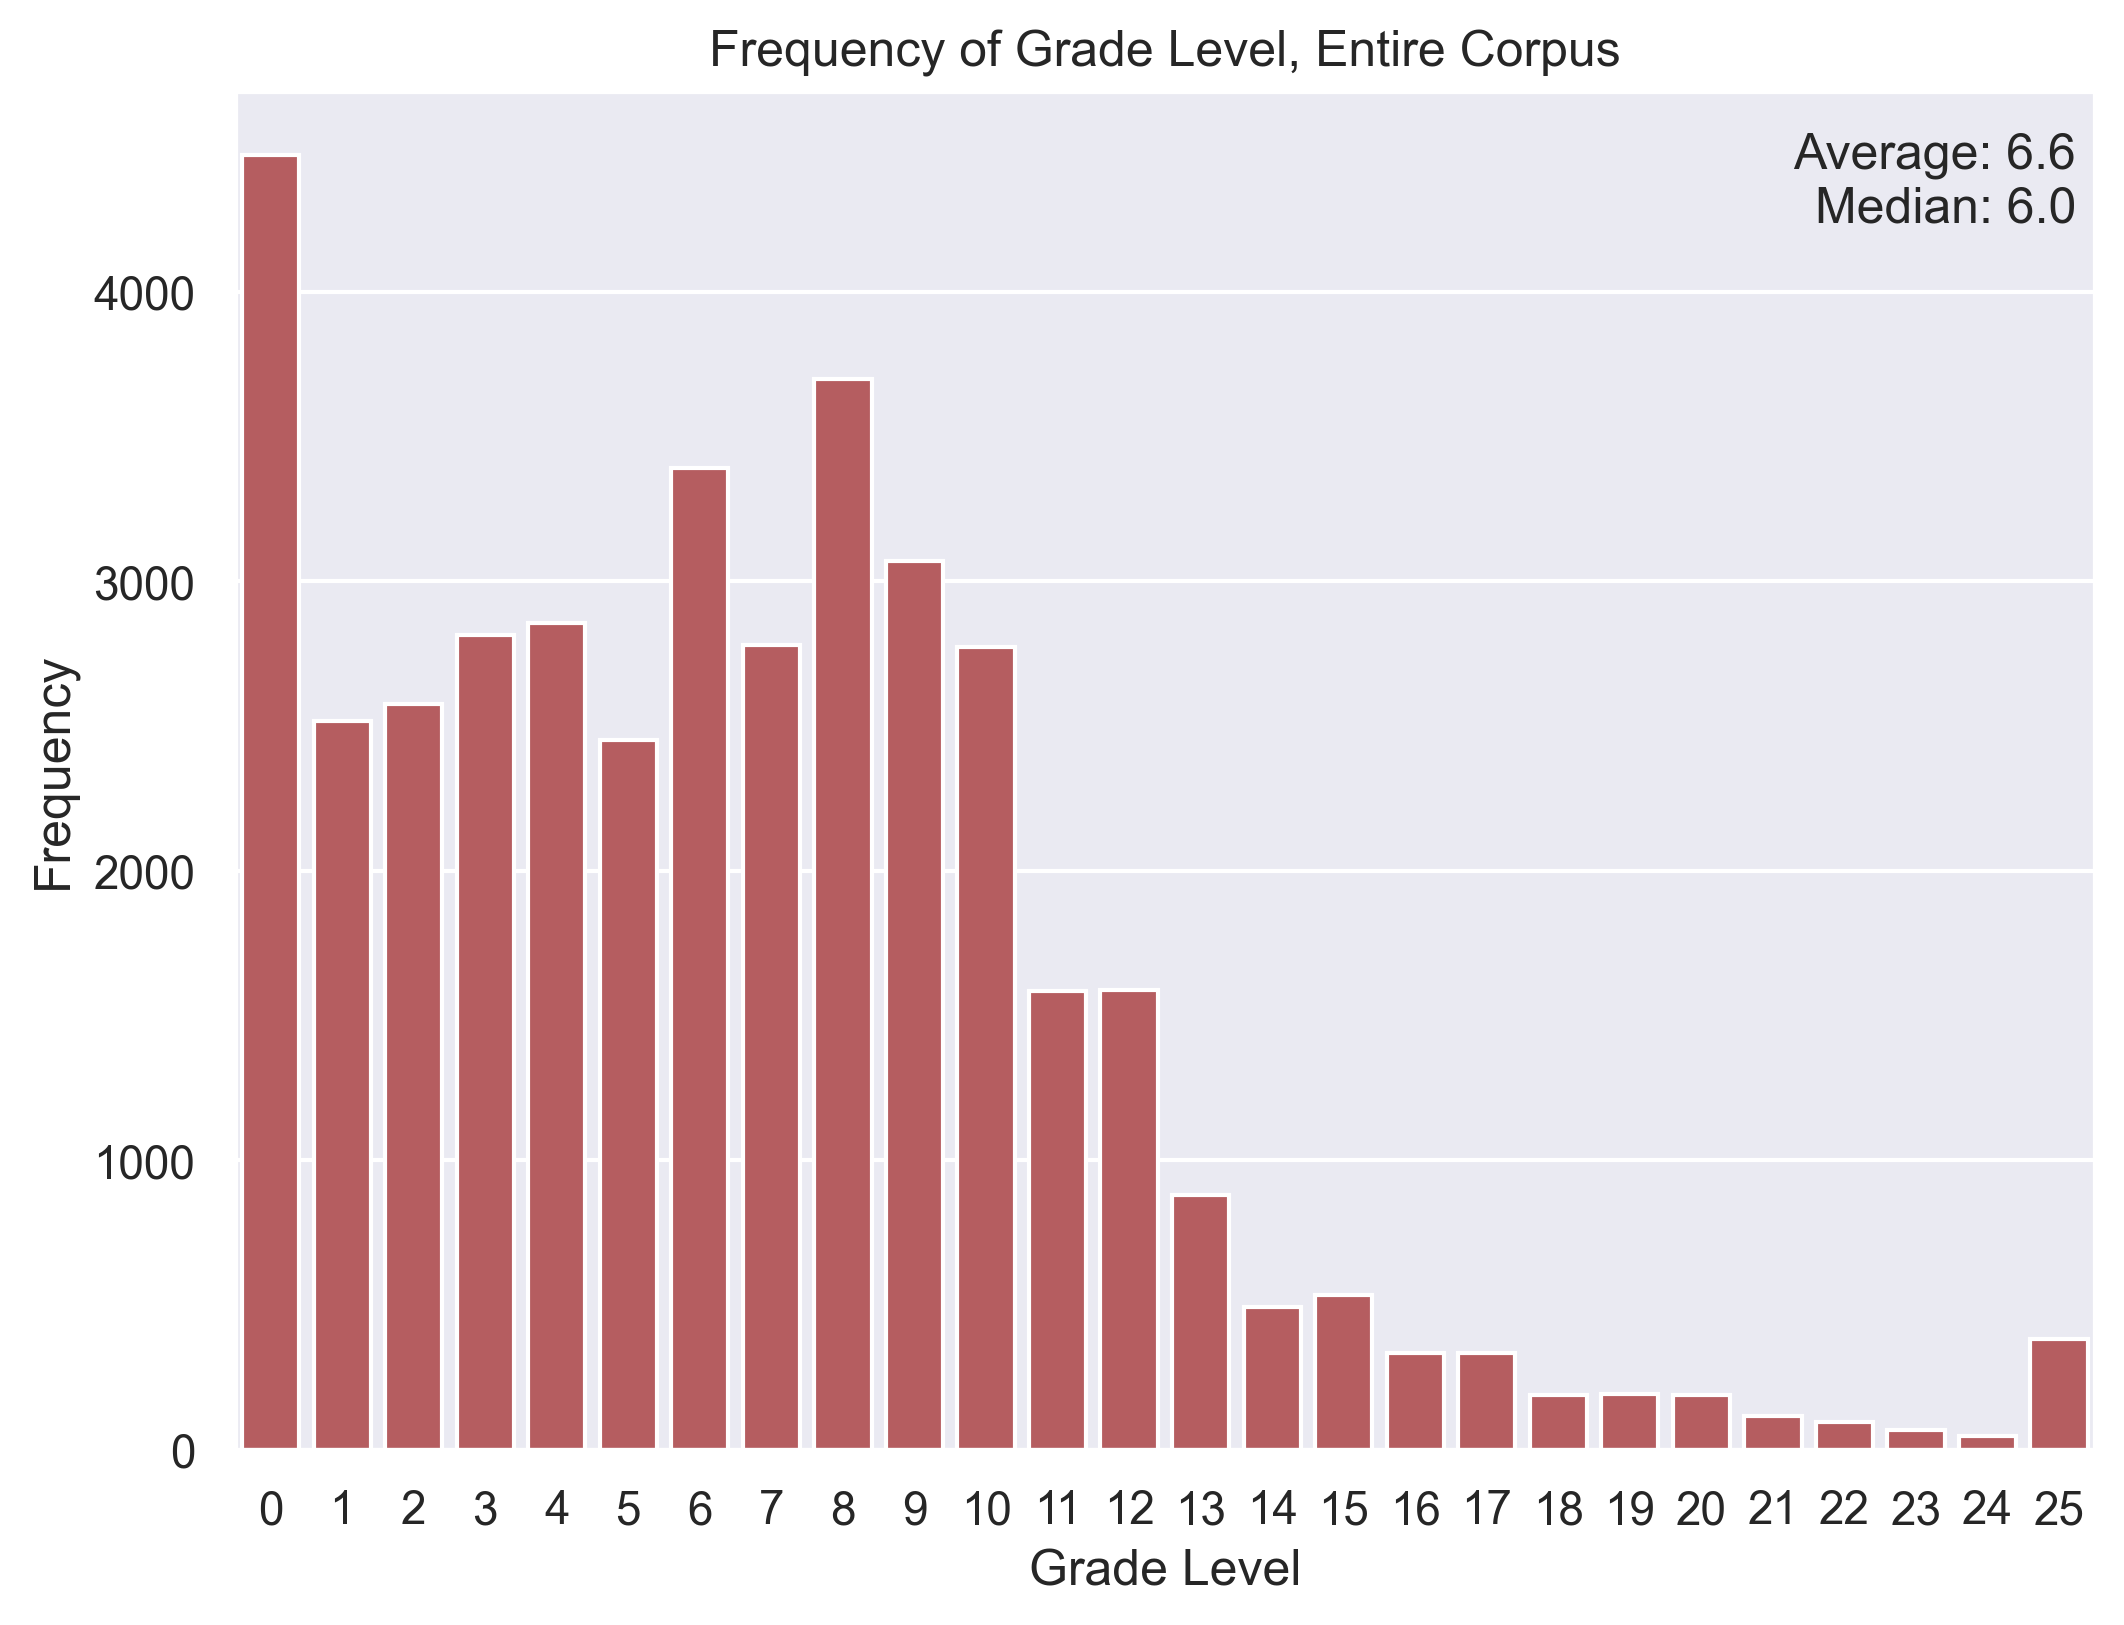

In [281]:
# Frequency of Grade Level across entire corpus

# Countplot of frequency of grade level
overall = sns.countplot(data=data_read, x="Grade level", color="r")
overall.set(title="Frequency of Grade Level, Entire Corpus", ylabel="Frequency", xlabel="Grade Level")

# Average and median grade level
avg_gradelevel = data_read["Grade level"].mean().round(1) # getting average grade level
med_gradelevel = data_read["Grade level"].median() # getting median grade level
overall.text(0.99,0.97, f"Average: {avg_gradelevel}", ha='right', va='top', transform=overall.transAxes) # placing text on plot
overall.text(0.99,0.93, f"Median: {med_gradelevel}", ha='right', va='top', transform=overall.transAxes) # placing text on plot

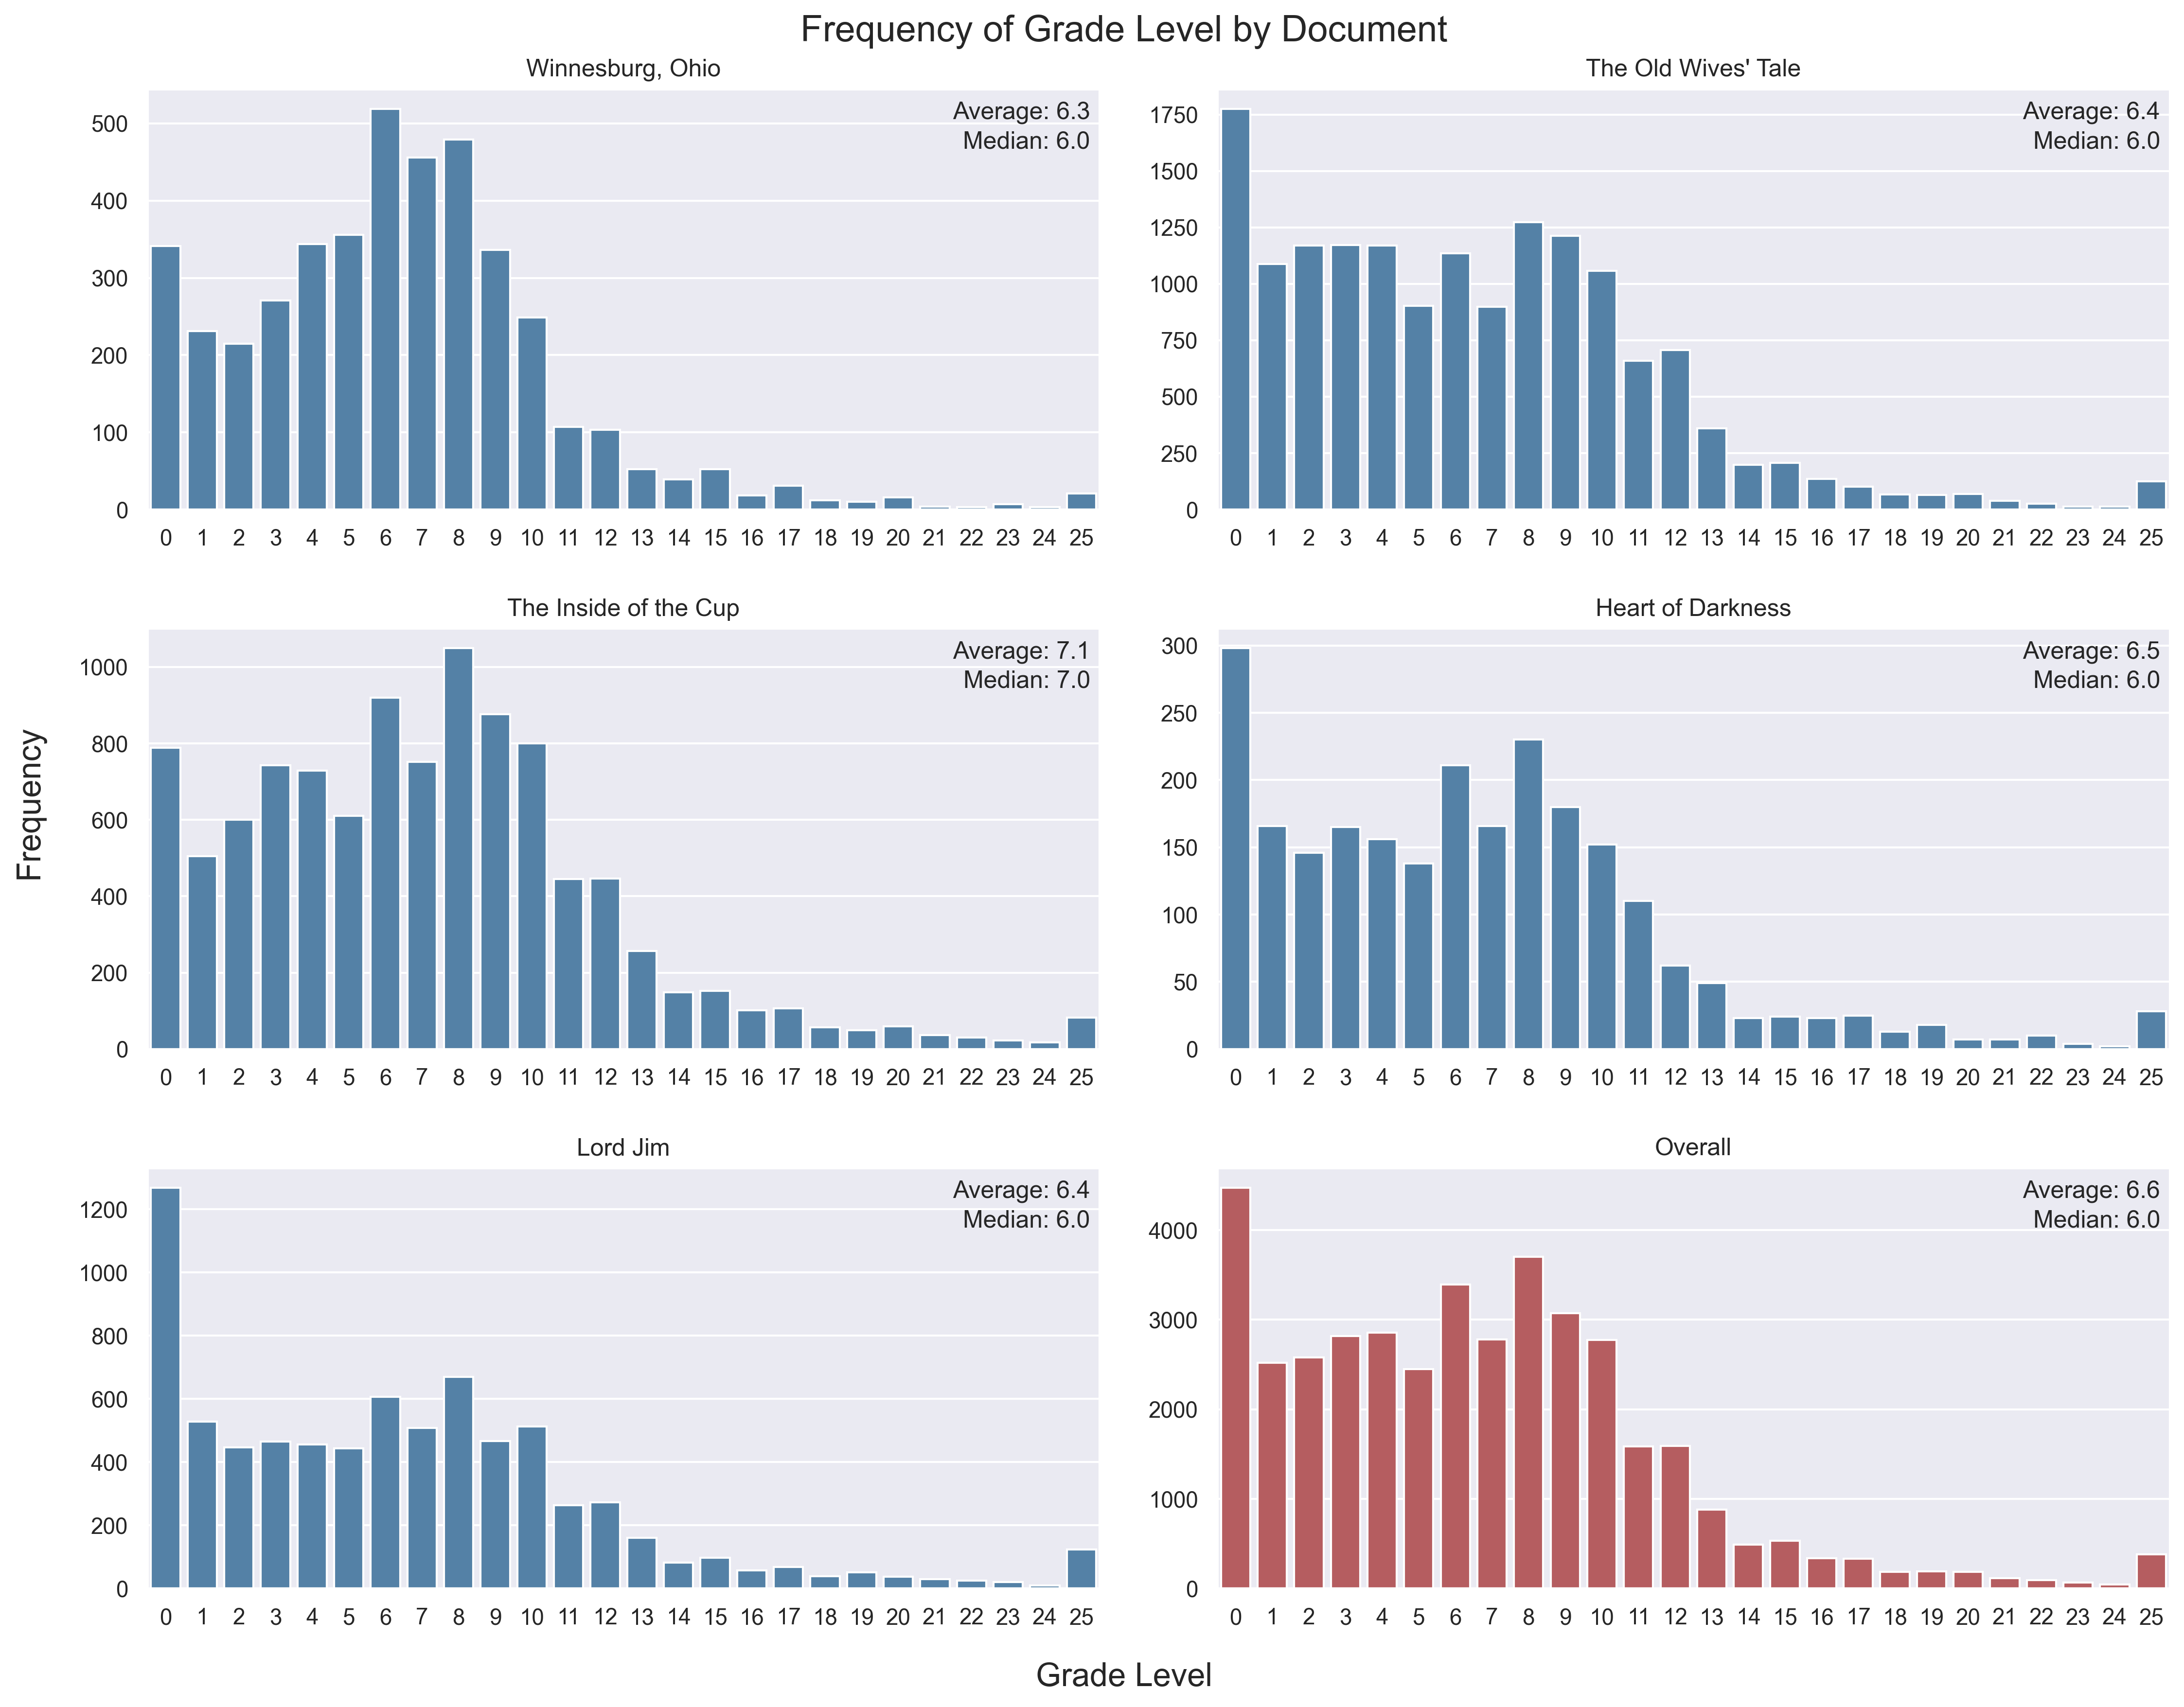

In [289]:
# Frequency of Grade Level by Document

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,12)) # 3x2 plot, increasing size of plot given density of subplots
plt.suptitle("Frequency of Grade Level by Document", fontsize=18, y=0.95) # Title

titles = ["Winnesburg, Ohio", "The Old Wives' Tale", "The Inside of the Cup", "Heart of Darkness", "Lord Jim"] # Document names as subplot labels

# For every document, create a subplot
for documentid, ax in zip(range(1,6), axes.ravel()):
    sns.countplot(data=data_read[data_read["Document ID"] == documentid], 
    x="Grade level", 
    color="steelblue", 
    ax=ax).set(title=titles[documentid-1], 
    ylabel="", xlabel="") # No individual x and y labels, empty string to get spacing

    # Average and median grade level
    avg_gradelevel = data_read[data_read["Document ID"] == documentid]["Grade level"].mean().round(1) # getting average grade level
    med_gradelevel = data_read[data_read["Document ID"] == documentid]["Grade level"].median() # getting median grade level
    ax.text(0.99,0.97, f"Average: {avg_gradelevel}", ha='right', va='top', transform=ax.transAxes) # placing text on plot
    ax.text(0.99,0.90, f"Median: {med_gradelevel}", ha='right', va='top', transform=ax.transAxes) # placing text on plot

# Readability across entire corpus, fills up remaining subplot given odd number of documents
overall = sns.countplot(data=data_read, x="Grade level", color="r", ax=axes[-1][-1]) # Last position in 2d array of subplot positions
overall.set(title="Overall", ylabel="", xlabel="") # No individual x and y labels, empty string to get spacing
avg_gradelevel = data_read["Grade level"].mean().round(1) # getting average grade level
med_gradelevel = data_read["Grade level"].median() # getting median grade level
overall.text(0.99,0.97, f"Average: {avg_gradelevel}", ha='right', va='top', transform=overall.transAxes) # placing text on plot
overall.text(0.99,0.90, f"Median: {med_gradelevel}", ha='right', va='top', transform=overall.transAxes) # placing text on plot

# Axis Titles
fig.text(0.5, 0, 'Grade Level', ha='center', va='center', fontsize=16 )
fig.text(0, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', fontsize=16 )

# Show plot, increase padding for axis titles to fit
fig.tight_layout(pad=2)
plt.show()

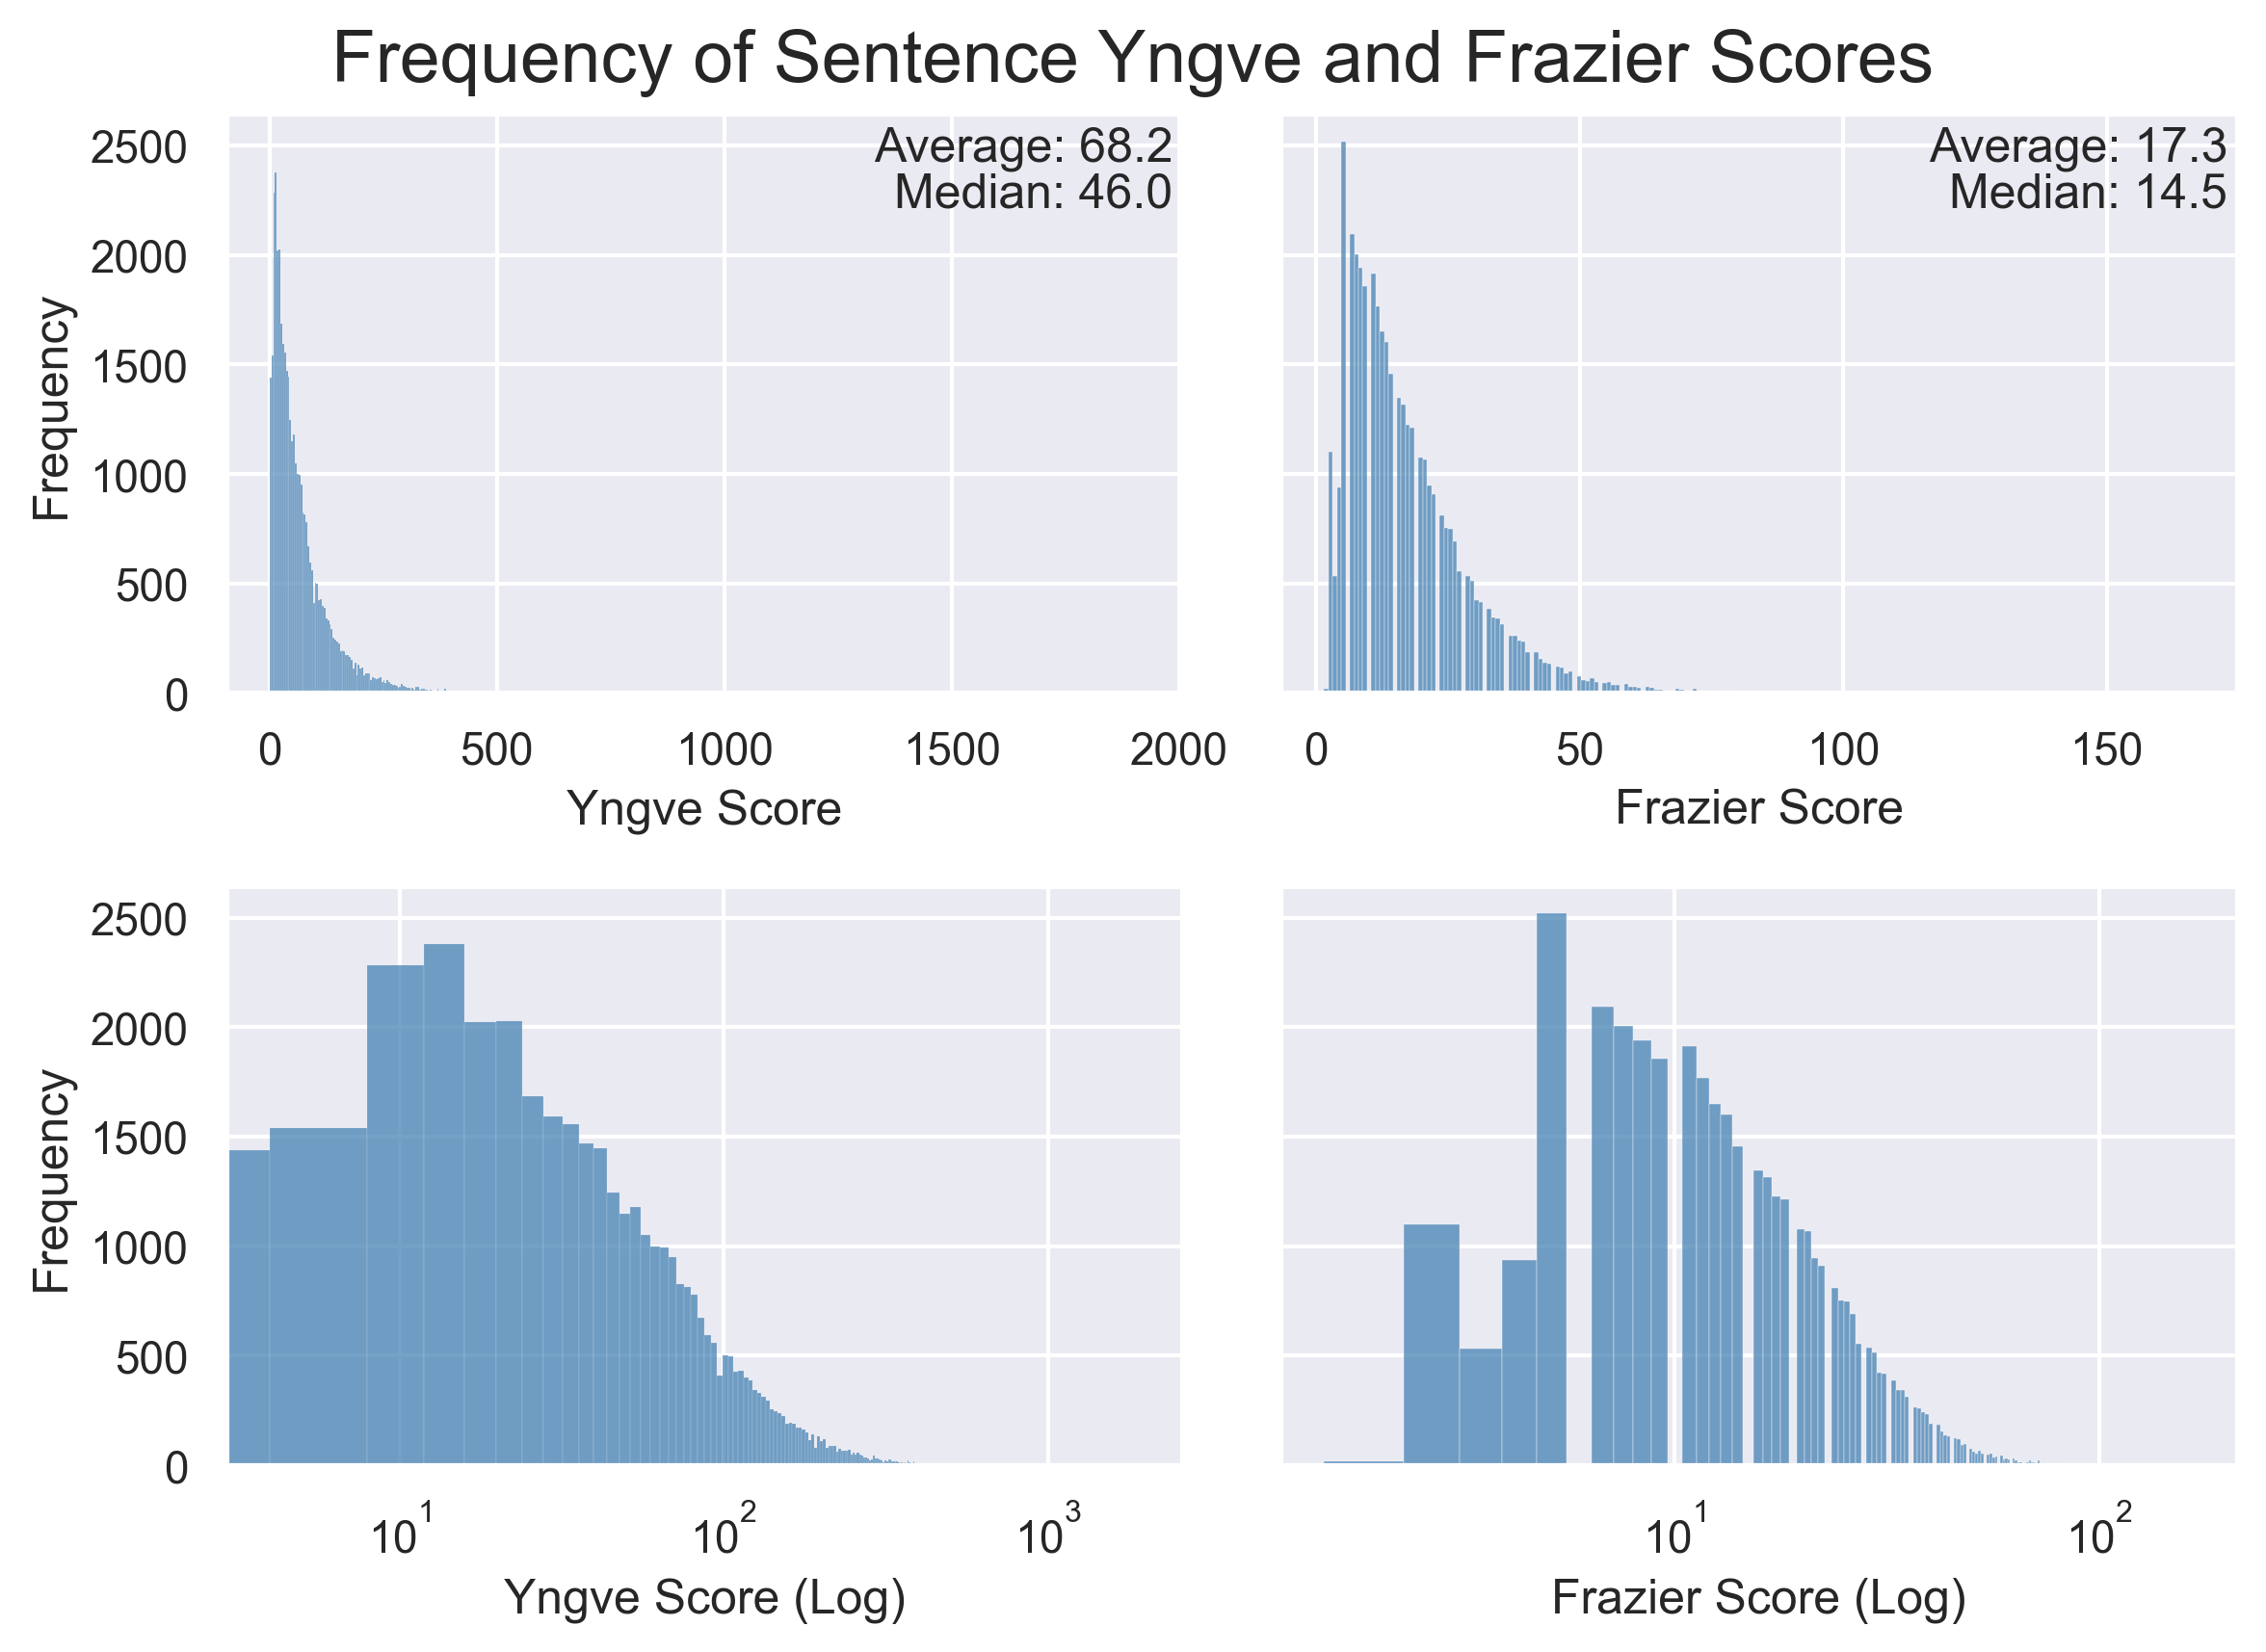

In [310]:
# Frequency of Yngve and Frazier Scores, including log scale

# Creating plot with 4 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, sharey=True) # 2x2 grid, sharing y-axis
fig.suptitle("Frequency of Sentence Yngve and Frazier Scores", fontsize=18, y=0.95) # Title

# Yngve Score
com_plot_y = sns.histplot(data=data_com, x="Yngve score", color="steelblue", ax=ax1)
com_plot_y.set(xlabel="Yngve Score", ylabel="Frequency") # Labels
avg_com_y = data_com["Yngve score"].mean().round(1) # getting average score
med_com_y = data_com["Yngve score"].median() # getting median score
com_plot_y.text(0.99,0.98, f"Average: {avg_com_y}", ha='right', va='top', transform=com_plot_y.transAxes) # placing text on plot
com_plot_y.text(0.99,0.90, f"Median: {med_com_y}", ha='right', va='top', transform=com_plot_y.transAxes) # placing text on plot

# Frazier Score
com_plot_f = sns.histplot(data=data_com, x="Frazier score", color="steelblue", ax=ax2)
com_plot_f.set(xlabel="Frazier Score") # Labels
avg_com_f = data_com["Frazier score"].mean().round(1) # getting average score
med_com_f = data_com["Frazier score"].median() # getting median score
com_plot_f.text(0.99,0.98, f"Average: {avg_com_f}", ha='right', va='top', transform=com_plot_f.transAxes) # placing text on plot
com_plot_f.text(0.99,0.90, f"Median: {med_com_f}", ha='right', va='top', transform=com_plot_f.transAxes) # placing text on plot

# Yngve Score Log
com_plot_yl = sns.histplot(data=data_com, x="Yngve score", color="steelblue", ax=ax3)
com_plot_yl.set(xlabel="Yngve Score (Log)", ylabel="Frequency")
ax3.set_xscale("log") # Log scale

# Frazier Score Log
com_plot_fl = sns.histplot(data=data_com, x="Frazier score", color="steelblue", ax=ax4)
com_plot_fl.set(xlabel="Frazier Score (Log)")
ax4.set_xscale("log") # Log scale

# Display plot
fig.tight_layout() # spaces out subplots
plt.show()


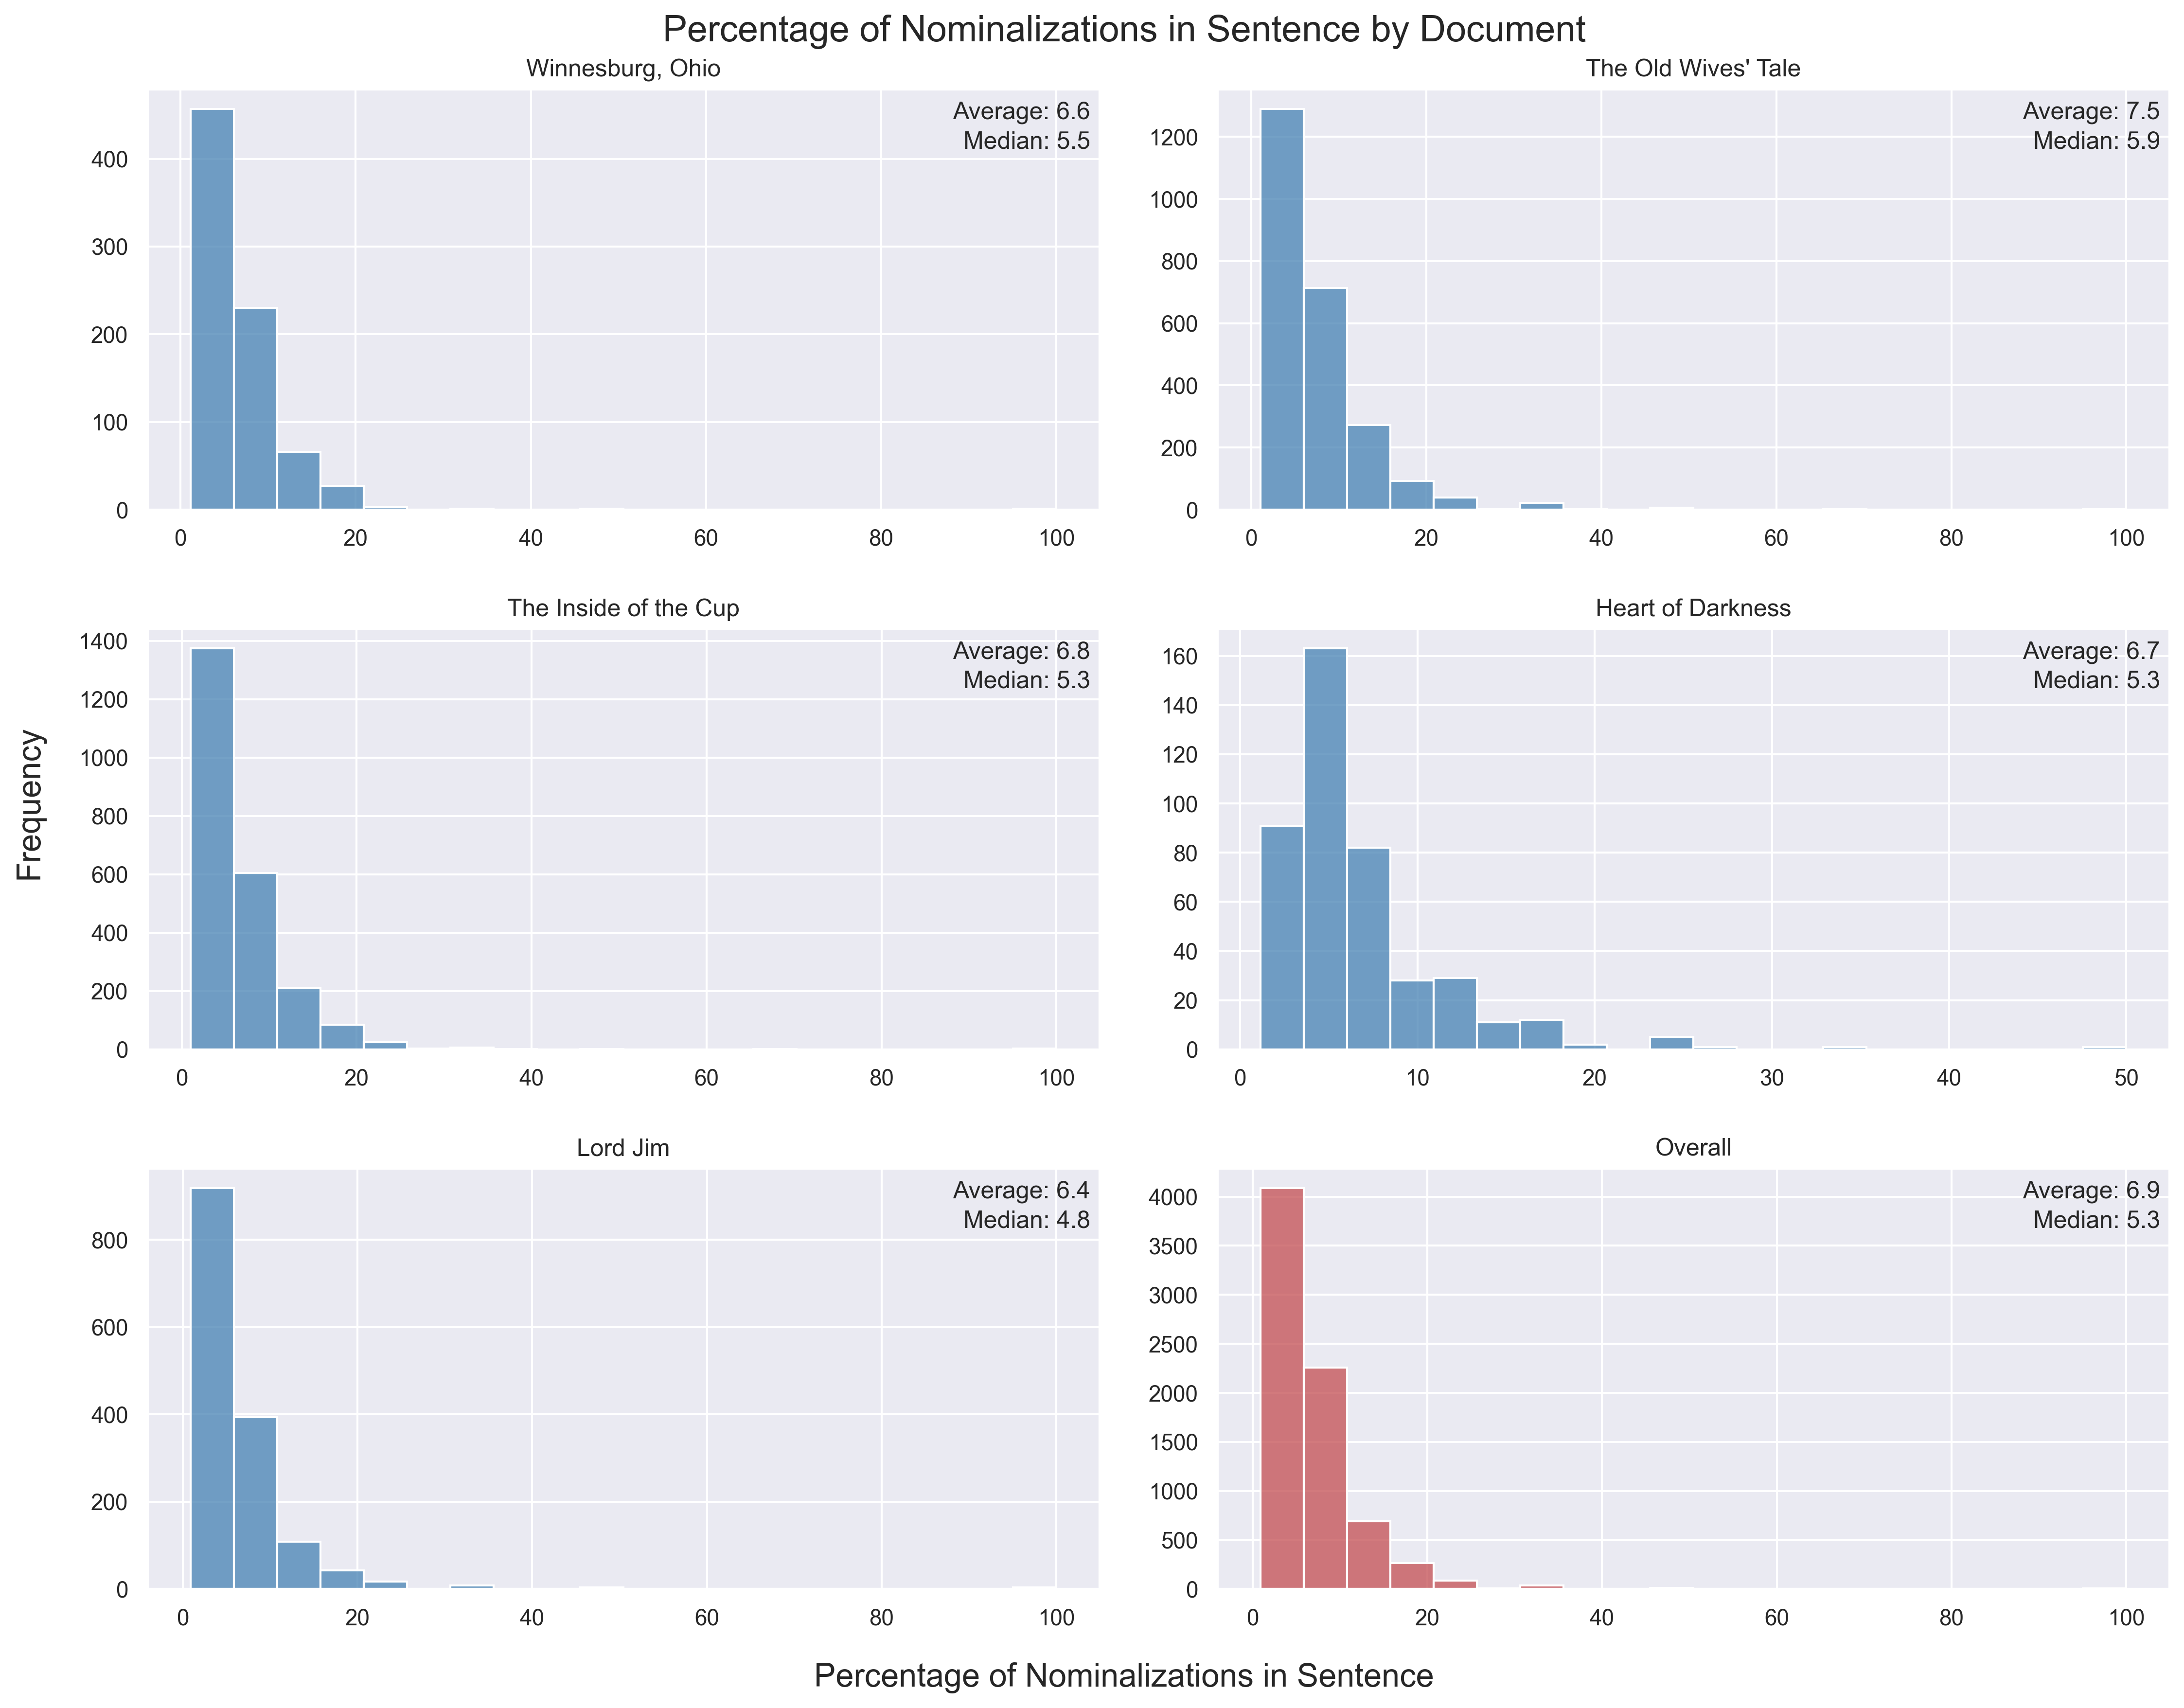

In [311]:
# Percentage of nominalizations in sentence

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,12)) # 3x2 grid, increased figure size given density of subplots
plt.suptitle("Percentage of Nominalizations in Sentence by Document", fontsize=18, y=0.95) # Title

titles = ["Winnesburg, Ohio", "The Old Wives' Tale", "The Inside of the Cup", "Heart of Darkness", "Lord Jim"] # Document names

# For every document, create histogram of count of nominalizations per document
for documentid, ax in zip(range(1,6), axes.ravel()):
    sns.histplot(data=data_nom[data_nom["Document ID"] == documentid],
    x="Percentage of Nominalizations in Sentence", 
    bins=20, # 20 bins (5% each)
    color="steelblue",
    ax=ax).set(title=titles[documentid-1], 
    ylabel="", xlabel="") # No individual x and y labels, empty string to get spacing

    # Average and median % of nominalizations in sentence
    avg = data_nom[data_nom["Document ID"] == documentid]["Percentage of Nominalizations in Sentence"].mean().round(1) # getting average % of nominalizations in sentence
    med = round(data_nom[data_nom["Document ID"] == documentid]["Percentage of Nominalizations in Sentence"].median(),1) # getting median % of nominalizations in sentence
    ax.text(0.99,0.97, f"Average: {avg}", ha='right', va='top', transform=ax.transAxes) # placing text on plot
    ax.text(0.99,0.90, f"Median: {med}", ha='right', va='top', transform=ax.transAxes) # placing text on plot

# Readability across entire corpus, fills up remaining subplot
overall = sns.histplot(data=data_nom, x="Percentage of Nominalizations in Sentence", bins=20, color="r", ax=axes[-1][-1]) 
overall.set(title="Overall", ylabel="", xlabel="") # No individual x and y labels, empty string to get spacing

# Average and median % of nominalizations in sentence
avg = data_nom["Percentage of Nominalizations in Sentence"].mean().round(1) # getting average % of nominalizations in sentence
med = round(data_nom["Percentage of Nominalizations in Sentence"].median(), 1) # getting average % of nominalizations in sentence
overall.text(0.99,0.97, f"Average: {avg}", ha='right', va='top', transform=overall.transAxes) # placing text on plot
overall.text(0.99,0.90, f"Median: {med}", ha='right', va='top', transform=overall.transAxes) # placing text on plot

# Axis Titles
fig.text(0.5, 0, 'Percentage of Nominalizations in Sentence', ha='center', va='center', fontsize=16 )
fig.text(0, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', fontsize=16 )

# Show plot, spacing for titles
fig.tight_layout(pad=2)
plt.show()